In [1]:
import time
import os
import re
import datetime
import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# ディビジョンを日本語に
def div_ja(division):
    sex = '男子' if division[-1]=='m' else '女子'
    return 'V{0}{1}'.format(division[1], sex)

In [2]:
division = 'v1_w'
paths = glob.glob('../database/{}/teamdb_*'.format(division))
# paths = paths[-5:]
print(paths)

['../database/v1_w\\teamdb_1999-00_regular.csv', '../database/v1_w\\teamdb_2000-01_regular.csv', '../database/v1_w\\teamdb_2001-02_regular.csv', '../database/v1_w\\teamdb_2002-03_regular.csv', '../database/v1_w\\teamdb_2003-04_regular.csv', '../database/v1_w\\teamdb_2004-05_regular.csv', '../database/v1_w\\teamdb_2005-06_regular.csv', '../database/v1_w\\teamdb_2006-07_regular.csv', '../database/v1_w\\teamdb_2007-08_regular.csv', '../database/v1_w\\teamdb_2008-09_regular.csv', '../database/v1_w\\teamdb_2009-10_regular.csv', '../database/v1_w\\teamdb_2010-11_regular.csv', '../database/v1_w\\teamdb_2011-12_regular.csv', '../database/v1_w\\teamdb_2012-13_regular.csv', '../database/v1_w\\teamdb_2013-14_regular.csv', '../database/v1_w\\teamdb_2014-15_regular.csv', '../database/v1_w\\teamdb_2015-16_regular.csv', '../database/v1_w\\teamdb_2016-17_regular.csv', '../database/v1_w\\teamdb_2017-18_regular.csv', '../database/v1_w\\teamdb_2018-19_regular.csv', '../database/v1_w\\teamdb_2019-20_regul

In [16]:
division = 'v3_m'
year = '2021-22_regular'
player_db_path =  '../database/{0}/playerdb_{1}.csv'.format(division,year)
team_db_path =  '../database/{0}/teamdb_{1}.csv'.format(division,year)
player_db = pd.read_csv(player_db_path)
team_db = pd.read_csv(team_db_path)
team_db.head()

,AA,AP,AE,ASucc%,AP/S,BAA,BAP,BAE,BASucc%,BP,...,OpBP/S,OpSVA,OpSVP,OpSVE,OpSVx,OpSVEff%,OpRA,OpRx,OpRg,OpRSucc%
0,96,39,11,40.6,13.00,22,6,5,27.3,4,...,1.00,73,3,10,11,4.5,52,28.0,10.0,63.5
1,89,45,4,50.6,15.00,19,6,4,31.6,3,...,1.33,62,1,9,13,3.2,60,31.0,16.0,65.0
2,71,35,7,49.3,11.67,10,4,3,40.0,9,...,2.00,57,0,10,6,-1.8,64,30.0,17.0,60.2
3,80,33,14,41.2,11.00,10,3,3,30.0,6,...,3.00,74,5,9,13,8.1,47,32.0,9.0,77.7
4,89,45,9,50.6,15.00,21,10,3,47.6,11,...,3.00,58,1,5,17,6.9,68,28.0,17.0,53.7


In [17]:
team_db.columns

Index(['AA', 'AP', 'AE', 'ASucc%', 'AP/S', 'BAA', 'BAP', 'BAE', 'BASucc%',
       'BP', 'BP/S', 'SVA', 'SVP', 'SVE', 'SVx', 'SVEff%', 'RA', 'Rx', 'Rg',
       'RSucc%', 'MatchNo.', 'Date', 'Year', 'Month', 'Day', 'Place', 'Venue',
       'Team', 'Op.Team', 'Director', 'Coach', 'Win_Set', 'Lose_Set',
       'Total_Set', 'Win_Lose', 'Get_Point', 'Lose_Point', 'Game_Time',
       'Start_Time', 'End_Time', 'Spectators', 'Jury', 'Chief_Umpire',
       'Sub_Umpire', 'Judgeman', 'Home_Away', 'OpAA', 'OpAP', 'OpAE',
       'OpASucc%', 'OpAP/S', 'OpBAA', 'OpBAP', 'OpBAE', 'OpBASucc%', 'OpBP',
       'OpBP/S', 'OpSVA', 'OpSVP', 'OpSVE', 'OpSVx', 'OpSVEff%', 'OpRA',
       'OpRx', 'OpRg', 'OpRSucc%'],
      dtype='object')

In [18]:
team_db_total = team_db.groupby('Team').sum()
team_db_total[['Win_Set', 'Lose_Set']]

,Win_Set,Lose_Set
Team,,
アイシンティルマーレ,35,11
トヨタモビリティ東京スパークル,10,30
近畿クラブスフィーダ,28,26
長野GaRons,24,30


In [19]:
team_db['Set'] = team_db['Win_Set'] + team_db['Lose_Set']

In [20]:
def stats_calc(df):
    df['Set'] = df['Win_Set'] + df['Lose_Set']
    df['ASucc%'] = ((df['AP'] / df['AA']) * 100).round(1)
    df['AEff%'] = (((df['AP']-df['AE']) /
                     df['AA']) * 100).round(1)
    df['BASucc%'] = ((df['BAP'] / df['BAA']) * 100).round(1)
    df['AP/S'] = (df['AP'] / df['Set']).round(2)
    df['BP/S'] = (df['BP'] / df['Set']).round(2)
    df['SVEff%'] = ((df['SVP'] * 100 + df['SVx'] * 25 -
                    df['SVE'] * 25) / df['SVA']).round(1)
    df['RSucc%'] = (
        (df['Rx'] * 100 + df['Rg'] * 50) / df['RA']).round(1)
    return df

In [21]:
team_db_total = stats_calc(team_db_total)
team_db_total

,AA,AP,AE,ASucc%,AP/S,BAA,BAP,BAE,BASucc%,BP,...,OpSVP,OpSVE,OpSVx,OpSVEff%,OpRA,OpRx,OpRg,OpRSucc%,Set,AEff%
Team,,,,,,,,,,,,,,,,,,,,,
アイシンティルマーレ,1439,670,93,46.6,14.57,317,151,34,47.6,101,...,27,130,168,48.1,920,431.0,213.0,758.7,46,40.1
トヨタモビリティ東京スパークル,1176,500,102,42.5,12.50,138,57,21,41.3,63,...,34,108,186,62.9,688,323.0,177.0,659.8,40,33.8
近畿クラブスフィーダ,1628,707,133,43.4,13.09,236,102,22,43.2,145,...,44,164,267,80.4,1082,607.0,225.0,928.4,54,35.3
長野GaRons,1619,721,139,44.5,13.35,307,129,47,42.0,123,...,49,170,308,97.2,1066,502.0,270.0,827.6,54,35.9


In [22]:
team_db_main = team_db_total[['ASucc%', 'BASucc%', 'BP/S', 'SVEff%', 'RSucc%']]
team_db_main

,ASucc%,BASucc%,BP/S,SVEff%,RSucc%
Team,,,,,
アイシンティルマーレ,46.6,47.6,2.20,6.5,64.3
トヨタモビリティ東京スパークル,42.5,41.3,1.58,4.7,64.2
近畿クラブスフィーダ,43.4,43.2,2.69,4.6,61.3
長野GaRons,44.5,42.0,2.28,6.2,56.9


In [30]:
index={
    "v1_m": [
        "サントリーサンバーズ","ウルフドッグス名古屋","パナソニックパンサーズ","東レアローズ",
        "堺ブレイザーズ","JTサンダーズ広島","ジェイテクトSTINGS","FC東京",
        "大分三好ヴァイセアドラー","VC長野トライデンツ"
    ],
    "v2_m": [
        "ヴォレアス北海道","富士通カワサキレッドスピリッツ","ヴィアティン三重", 
        "埼玉アザレア","サフィルヴァ北海道","大同特殊鋼レッドスター",
        "兵庫デルフィーノ","きんでんトリニティーブリッツ","つくばユナイテッドSunGAIA",
        "トヨタ自動車サンホークス","奈良ドリーマーズ","警視庁フォートファイターズ",
        "東京ヴェルディ","クボタスピアーズ","千葉ZELVA"
    ],
    "v3_m": [
        "アイシンティルマーレ","近畿クラブスフィーダ","長野GaRons","トヨタモビリティ東京スパークル"
    ],
    "v1_w": [
        "JTマーヴェラス","東レアローズ","久光スプリングス","NECレッドロケッツ",
        "埼玉上尾メディックス","デンソーエアリービーズ","日立Astemoリヴァーレ","PFUブルーキャッツ",
        "岡山シーガルズ","トヨタ車体クインシーズ","ヴィクトリーナ姫路","KUROBEアクアフェアリーズ"
    ],
    "v2_w": [
        "群馬銀行グリーンウィングス","ルートインホテルズブリリアントアリーズ","プレステージ・インターナショナルアランマーレ",
        "GSS東京サンビームズ","千葉エンゼルクロス","リガーレ仙台","ブレス浜松",
        "大野石油広島オイラーズ","JAぎふリオレーナ","フォレストリーブズ熊本"
    ]
}
team_db_main_std = team_db_main.apply(lambda x: (x-x.mean())/x.std()).reindex(index=index[division])
team_db_main_std

,ASucc%,BASucc%,BP/S,SVEff%,RSucc%
Team,,,,,
アイシンティルマーレ,1.329715,1.441105,0.027271,1.010153,0.755598
近畿クラブスフィーダ,-0.480961,-0.114935,1.096306,-0.909137,-0.107943
長野GaRons,0.141459,-0.539309,0.201808,0.707107,-1.374468
トヨタモビリティ東京スパークル,-0.990214,-0.786861,-1.325384,-0.808122,0.726813


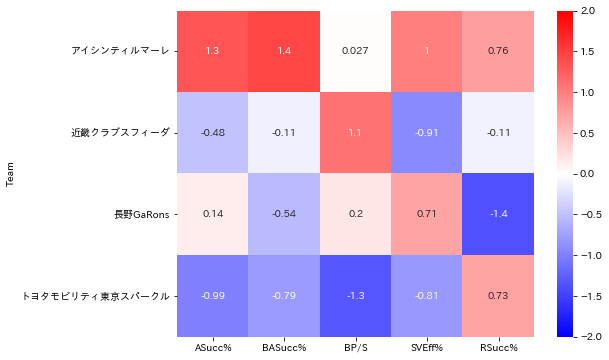

In [28]:
plt.figure(figsize=(8,6))
# sns.set(font_scale=2)
sns.heatmap(team_db_main_std, annot=True, cmap='bwr',vmax=2, vmin=-2)
plt.savefig('test.png', facecolor='white',bbox_inches="tight")
plt.show()